SHREEYASH RAHATE
# Prediction using Unsupervised ML

In [163]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [164]:
data = pd.read_csv('Downloads/Iris.csv')
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [165]:
features = data.iloc[:, [0, 1, 2, 3]].values
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

In [166]:
kmeans = KMeans(
       init="k-means++",
       n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=0
    )

In [167]:
kmeans.fit(features)

KMeans(n_clusters=3, random_state=0)

In [168]:
# The lowest SSE value
kmeans.inertia_

31320.711199999994

In [169]:
#Final locations of the centroid
kmeans.cluster_centers_


array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [170]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [171]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [172]:
y_kmeans = kmeans.fit_predict(features)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Choosing the Appropriate Number of Clusters
The elbow method AND 
The silhouette coefficient

In [173]:
features = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

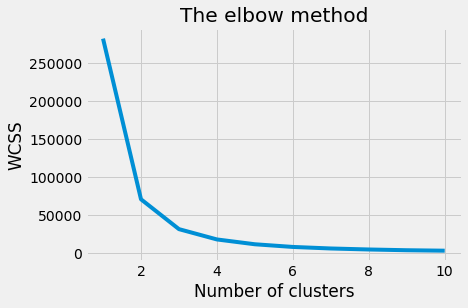

In [174]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [175]:
from kneed import KneeLocator

In [176]:
kl = KneeLocator(
range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

using the kneelocator() function (when visual interpretation is hard)
i.e 3 clusters  

### The silhouette coefficient 
is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [177]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
   
for k in range(3, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(features)
     score = silhouette_score(features, kmeans.labels_)
     silhouette_coefficients.append(score)

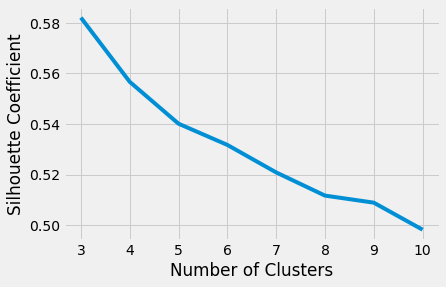

In [178]:
#plt.style.use("fivethirtyeight")

plt.plot(range(3, 11), silhouette_coefficients)
plt.xticks(range(3, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3 

# Evaluating Clustering Performance Using Advanced Techniques
The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

In [179]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

In [180]:
scaled_features = scaler.fit_transform(features)

In [181]:
#Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=4)
dbscan = DBSCAN(eps=0.3)
  
 # Fit the algorithms to the features
kmeans.fit(scaled_features.reshape(-1,1))
dbscan.fit(scaled_features.reshape(-1,1))

 # Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features.reshape(-1,1), kmeans.labels_
 ).round(2)
dbscan_silhouette = silhouette_score(
    scaled_features.reshape(-1,1), dbscan.labels_
 ).round (2)

In [182]:
kmeans_silhouette

0.57

In [183]:
dbscan_silhouette

0.59

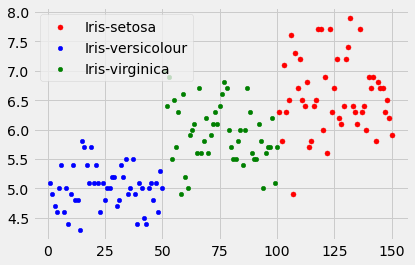

In [184]:
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], 
            s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0],features[y_kmeans == 1, 1], 
            s = 20, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1],
            s = 20, c = 'green', label = 'Iris-virginica')


plt.legend()